In [2]:
!pip install opencv-python

    100% |████████████████████████████████| 6.7MB 161kB/s 
    100% |████████████████████████████████| 16.8MB 71kB/s 
  Found existing installation: numpy 1.10.4
    DEPRECATION: Uninstalling a distutils installed project (numpy) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    Uninstalling numpy-1.10.4:
      Successfully uninstalled numpy-1.10.4
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [81]:
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt
import numpy as np
import cv2

from sklearn.svm import SVC

from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import make_scorer

from sklearn.cross_validation import StratifiedKFold, train_test_split

from sklearn.metrics import accuracy_score
# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.model_selection import GridSearchCV

In [38]:
X, y = load_svmlight_file('./digits/digit_train')

print(X[0].shape)
X = X.toarray()
print(X.shape)

(1, 771)
(500, 771)


In [39]:
zeros = np.zeros((X.shape[0],28*28- X.shape[1]))
X = np.concatenate((X, zeros), axis = 1)
X_train = X
y_train = y

In [41]:
X = X.reshape((len(X), 28, 28))

In [13]:
def plotSamples( no_samples, data, y ):
    for i in range(no_samples):
        plt.subplot(1,no_samples, i+1)
        plt.imshow(data[i], cmap= 'gray')
        plt.axis('off')
        plt.title((int(y[i])))

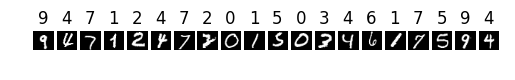

In [42]:
plotSamples(20, X, y)

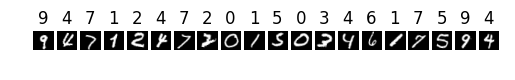

In [15]:
def rotateImages( data, degree ):
    new_data = []
    rows,cols = 28, 28
    M = cv2.getRotationMatrix2D((cols/2,rows/2), degree,1)
    for img in data:
        new_data.append(cv2.warpAffine(img,M,(rows,cols)))
    return new_data
rotates = rotateImages(X, -10)
plotSamples(20, rotates, y)

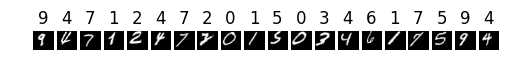

In [16]:
def distortImages( data, pts1, pts2 ):
    new_data = []
    rows,cols = 28, 28
    M = cv2.getAffineTransform(pts1,pts2)
    for img in data:
        new_data.append(cv2.warpAffine(img,M,(cols,rows)))
    return new_data

pts1 = np.float32([[3,3],[26,26],[26,3]])
pts2 = np.float32([[3,3],[20,20],[24,0]])
dist_images = distortImages( X, pts1, pts2 )
plotSamples(20, dist_images, y)

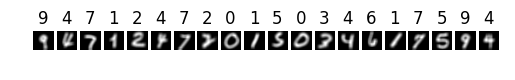

In [17]:
def blurImages( data, blur_param ):
    new_data = []
    rows,cols = 28, 28
    for img in data:
        new_data.append(cv2.GaussianBlur(img,(5,5),blur_param))
    return new_data
blurred_image = blurImages( X, 5 )
plotSamples(20, blurred_image, y)

In [18]:
np.concatenate( [[1],[2]], )

array([1, 2])

In [19]:
def extend_training_data(data, y, new_sets):
    new_data = data
    for ns in new_sets:
        new_data = np.concatenate((new_data, np.asarray(ns).reshape(data.shape)), axis = 0)
        
    new_data = (new_data - new_data.mean())/255
    new_data = new_data.reshape((new_data.shape[0],new_data.shape[1]*new_data.shape[2]))
    new_y  = np.tile( y, len(new_sets) + 1 )
    return new_data, new_y


X_train, Y_train = extend_training_data(X, y, [blurred_image, rotates])
print("X_shape")
print(X_train.shape)
print("Y_shape")
print(Y_train.shape)

X_shape
(1500, 784)
Y_shape
(1500,)


In [20]:
clf = SVC(C = 4, gamma = 0.03125)
scores = cross_val_score(clf, X_train, Y_train, cv=10)
print(scores)

[ 1.          1.          1.          0.94736842  0.96688742  0.98
  0.96621622  0.99319728  1.          1.        ]


In [47]:
X_train, Y_train = extend_training_data(X, y, [blurred_image, rotates])
clf = SVC(C = 4, gamma = 0.03125)
print("X_shape")
print(X_train.shape)
print("Y_shape")
print(Y_train.shape)
print("Training set with blurred and rotated extension")
scores = cross_val_score(clf, X_train, Y_train, cv=10, scoring="accuracy")
print(scores)

X_shape
(1500, 784)
Y_shape
(1500,)
Training set with blurred and rotated extension
[ 1.          1.          1.          0.94736842  0.96688742  0.98
  0.96621622  0.99319728  1.          1.        ]


In [90]:
train_X, test_X, train_y, test_y = train_test_split( X.reshape( ( X.shape[0], X.shape[1]*X.shape[2] )), y, test_size=0.33, random_state=42)

model = SVC(C = 4, gamma = 0.03125, decision_function_shape="ovr")
model.fit( train_X, train_y)
preds = model.predict( test_X )

print(preds)


[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.]


In [78]:
def cross_validation( X, y, fold = 10 ):
    results = np.zeros( (fold, 2) )
    kf = StratifiedKFold(y, fold)
    print("%d-fold validation " % fold )
    scores = []
    
    arr_X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
    
    for train_index, test_index in kf:
        print(train_index)
        model = SVC()
        
        current_train_x = X[train_index,:] 
        current_train_y = y[train_index]
            
        rotates = rotateImages( current_train_x, -10)
        pts1 = np.float32([[3,3],[26,26],[26,3]])
        pts2 = np.float32([[3,3],[20,20],[24,0]])
        dist_images = distortImages( current_train_x, pts1, pts2 )    
        blurred_images = blurImages( current_train_x, 5 )
#         extension = [ rotates, dist_images, blurred_images  ]
        extension = []

        current_train_x, current_train_y = extend_training_data(current_train_x, current_train_y, extension )
        
        model.fit( current_train_x, current_train_y )
        
        
        preds = model.predict( arr_X[test_index,:] )
#         print(current_train_x.shape)
        print(current_train_y)
#         print(preds)
#         print(y[test_index])
        scores.append( accuracy_score(preds, y[test_index]) )


    print("avg acc : %2.2f 士 %2.2f" % ( np.mean(scores), np.std(scores) ) ) 
    return ( np.mean(scores), np.std(scores) )

cross_validation( X, y, 3 )

3-fold validation 
[109 112 123 132 135 139 147 148 153 155 158 163 165 168 173 176 177 178
 179 180 181 182 183 184 185 186 187 189 190 191 192 193 194 196 197 199
 200 203 204 205 206 207 208 209 211 212 213 215 216 217 218 219 220 221
 222 223 224 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410

(0.11401738304312144, 0.0014099981541107105)